In [5]:
!pip install beautifulsoup4

In [6]:
from bs4 import BeautifulSoup
import requests
url= BeautifulSoup('https://www.worldometers.info/coronavirus/', 'html.parser')
soup = requests.get(url)
soup

C:\Users\pc\anaconda3\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


<Response [200]>

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-ic
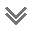

In [7]:
codes = soup.text
codes = BeautifulSoup(codes, "lxml")
codes

In [8]:
table_codes = codes.table
table_codes

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [9]:
table_codes = codes.table
tags=table_codes.find_all('tr')
tags

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td></td>


In [12]:
for tag in tags:
    print(tag.text)


#
Country,Other
TotalCases
NewCases
TotalDeaths
NewDeaths
TotalRecovered
NewRecovered
ActiveCases
Serious,Critical
Tot Cases/1M pop
Deaths/1M pop
TotalTests
Tests/
1M pop

Population
Continent
1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl
New Cases/1M pop
New Deaths/1M pop
Active Cases/1M pop




North America

118,177,664
+3
1,556,109

113,705,345
+3,200
2,916,210
7,806





North America














Asia

195,164,717
+188,974
1,491,352
+282
188,098,317
+77,256
5,575,048
9,147





Asia














Europe

235,366,670
+18,854
1,947,853
+193
229,190,979
+168,192
4,227,838
7,683





Europe














South America

64,529,523

1,333,576

62,869,203
+296
326,744
10,094





South America














Oceania

12,688,556
+3,373
21,770
+16
12,512,305

154,481
97





Australia/Oceania














Africa

12,682,707

257,952

12,008,308

416,447
842





Africa
















721

15

706

0
0



















World
638,610,558
+211,204
6,608,627
+491
618,385,163
+248,

In [13]:
data = []
for tag in tags:
    data.append(tag.text.split('\n'))[1:]
print(data)

TypeError: 'NoneType' object is not subscriptable

In [14]:
import csv
with open('covid_data.csv','x') as f:
    x = csv.writer(f)
    x.writerows(data)

FileExistsError: [Errno 17] File exists: 'covid_data.csv'

In [16]:
pwd

'C:\\Users\\pc\\pythonclass'

In [17]:
data = []
for tag in tags:
    y = tag.text.split('\n')
    if y[1] !='':
        data.append (y[1:])
print(data)

[['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/', '1M pop', '', 'Population', 'Continent', '1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop', 'Active Cases/1M pop', ''], ['1', 'USA', '99,639,207', '', '1,098,221 ', '', '97,149,970', '', '1,391,016', '2,625', '297,603', '3,280', '1,132,204,334', '3,381,680', '334,805,269 ', 'North America', '33050', '', '', '4,155', ''], ['2', 'India', '44,660,108', '', '530,486 ', '', '44,113,761', '', '15,861', '698', '31,750', '377', '901,414,928', '640,832', '1,406,631,776 ', 'Asia', '312,6522', '', '', '11', ''], ['3', 'France', '36,946,904', '', '157,277 ', '', '36,101,330', '', '688,297', '869', '563,348', '2,398', '271,490,188', '4,139,547', '65,584,518 ', 'Europe', '24170', '', '', '10,495', ''], ['4', 'Germany', '35,823,771', '', '154,535 '

In [18]:
import csv
with open('covid_data.csv','w') as f:
    x = csv.writer(f)
    x.writerows(data)

In [7]:
import pandas as pd 
df = pd.read_csv('covid_data.csv',encoding = 'ISO 8859-1')
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,Tests/,1M pop,Unnamed: 15,Population,Continent,1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Unnamed: 22
0,1,USA,"99,639,207",NaN,"1,098,221",NaN,"97,149,970",NaN,"1,391,016","2,625",...,"3,381,680","334,805,269",North America,33050,NaN,NaN,"4,155",NaN,NaN,NaN
1,2,India,"44,660,108",NaN,"530,486",NaN,"44,113,761",NaN,"15,861",698,...,"640,832","1,406,631,776",Asia,"312,6522",NaN,NaN,11,NaN,NaN,NaN
2,3,France,"36,946,904",NaN,"157,277",NaN,"36,101,330",NaN,"688,297",869,...,"4,139,547","65,584,518",Europe,24170,NaN,NaN,"10,495",NaN,NaN,NaN
3,4,Germany,"35,823,771",NaN,"154,535",NaN,"34,368,800",NaN,"1,300,436","1,406",...,"1,458,359","83,883,596",Europe,25431,NaN,NaN,"15,503",NaN,NaN,NaN
4,5,Brazil,"34,892,134",NaN,"688,419",NaN,"34,067,695",NaN,"136,020","8,318",...,"296,146","215,353,593",South America,63133,NaN,NaN,632,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,Vatican City,29,NaN,,NaN,29,NaN,0,NaN,...,NaN,799,Europe,28,NaN,NaN,NaN,NaN,NaN,NaN
226,227,Tuvalu,23,NaN,,NaN,NaN,NaN,23,NaN,...,NaN,"12,066",Australia/Oceania,525,NaN,NaN,"1,906",NaN,NaN,NaN
227,228,Western Sahara,10,NaN,1,NaN,9,NaN,0,NaN,...,NaN,"626,161",Africa,"62,616626,161",NaN,NaN,NaN,NaN,NaN,NaN
228,229,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
pwd

'C:\\Users\\pc\\pythonclass'

In [9]:
country = list(df['Country,Other'])[0:10]
totalcases = list(df['TotalCases'])[0:10]
totalCases = []

for i in totalcases:
    z = i.replace(',','')
    totalCases.append(int(z))
    
totalCases
    

[99639207,
 44660108,
 36946904,
 35823771,
 34892134,
 25838239,
 23930041,
 23642011,
 22608547,
 21459284]

In [16]:
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=country, y=totalCases)])
fig.show()

NameError: name 'country' is not defined

In [11]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=country, values=totalCases)])
fig.show()